# Pittsburgh's Best Neighborhood
### Advaitha Agastheeswaran
Data Set- [Grow Pittsburgh Food Gardens] (https://data.wprdc.org/dataset/grow-pittsburgh-food-gardens) G


Group Name: Green Beans

Metric- Pittsburgh Gardens

In [98]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [149]:
#loading the entire dataset for the gardens in Pittsburgh as a csv file
data = pd.read_csv("gardens.csv", low_memory=False)
row_count = len(data) #adding a row_count variable to refer to rather than hard coding '80 rows'
data.head(row_count)

,_id,urban_grower,grower_id,category,url,street_address,city,state,zip_code,country,latitude,longitude
0,1,Angora Gardens,584,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,3 Muse Lane,White Oak,Pennsylvania,15131.0,US,40.404686,-79.862095
1,2,Everybody's Garden,586,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,301 West Elizabeth Street,Pittsburgh,Pennsylvania,15207.0,US,40.406546,-79.945442
2,3,EvGard Extension,587,other,https://www.growpittsburgh.org/directory/garde...,NaN,Pittsburgh,Pennsylvania,15201.0,US,40.406377,-79.945559
3,4,Glen Hazel Communiuty Garden,588,other,https://www.growpittsburgh.org/directory/garde...,Johnston Avenue at Roselle Drive,Pittsburgh,Pennsylvania,15207.0,US,40.406040,-79.931253
4,5,Grow Pittsburgh,589,grow-pittsburgh-site,https://www.growpittsburgh.org/directory/garde...,6587 Hamilton Avenue #2W,Pittsburgh,Pennsylvania,15206.0,US,40.458481,-79.911381
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,Penn Hills Community Garden,734,allegheny-grows-site|sustainability-fund-site,https://www.growpittsburgh.org/directory/garde...,1162 Jefferson Road,Penn Hills,Pennsylvania,15235.0,US,40.447638,-79.798817
76,77,Stanton Heights Allegheny Cemetery Community G...,735,sustainability-fund-site,https://www.growpittsburgh.org/directory/garde...,Stanton Avenue,Pittsburgh,Pennsylvania,15201.0,US,40.473711,-79.961237
77,78,The Harry Orlando Memorial Community Garden,736,community-garden,https://www.growpittsburgh.org/directory/garde...,2205 5th Avenue,Pittsburgh,Pennsylvania,15219.0,US,40.438247,-79.973943
78,79,The Octopus Garden,738,community-garden,https://www.growpittsburgh.org/directory/garde...,133 S. Aiken Avenue,Pittsburgh,Pennsylvania,15206.0,US,40.463591,-79.936771


In [153]:
#narrowing the data down to specific important rows that we actually want to measure
specific_data = data[["_id", "zip_code", "urban_grower", "street_address", "category"]]
# specifically looks for data related to the greenery in Squirrel Hill
target_zip_codes = [15217, 15232, 15289, 15213]
filtered_data1 = specific_data[specific_data['zip_code'].isin(target_zip_codes)]
row_count1 = len(filtered_data1)
filtered_data1.head(row_count1)

,_id,zip_code,urban_grower,street_address,category
7,8,15213.0,South Oakland Community Orchard,3213 Parkview Avenue,other
13,14,15213.0,Community Human Services Teaching Garden,370 Lawn Street,community-farm
14,15,15213.0,Landslide Community Farm,3 Beelen Street,community-farm
17,18,15213.0,Earl Brooks Community Garden,222 Robinson Street,community-farm
30,31,15217.0,Colfax Elementary,2332 Beechwood Boulevard,school-garden
31,32,15217.0,Community Day School of Pittsburgh,6424 Forward Avenue,school-garden
62,63,15213.0,Frazier Farms Community Garden,3638 Frazier Street,sustainability-fund-site|school-garden


In [159]:
# count the number of growers in each zip code based on narrowed down data 
filtered_data2 = filtered_data1.groupby('zip_code').size().reset_index(name='grower_count')
filtered_data2 = filtered_data2.sort_values(by='grower_count', ascending=False)
print(filtered_data2)

   zip_code  grower_count
0   15213.0             5
1   15217.0             2


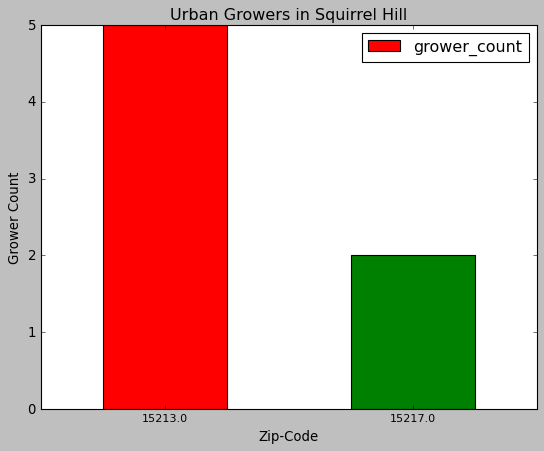

In [173]:
# creates a bar chart to visualize the grower counts based on the zip code
filtered_data2.plot.bar(
    x='zip_code',  # use zip code as the x-axis
    y='grower_count',  # use grower count as the y-axis
    rot=0,  # rotates the x-axis labels to be more readable
    color=['red', 'green', 'blue', 'orange']  # Assign custom colors for each bar
)
#creates the bar graph
plt.xticks(fontsize=10)  
plt.style.use('classic') 
plt.title('Urban Growers in Squirrel Hill')  
plt.xlabel('Zip-Code') 
plt.ylabel('Grower Count')  
plt.show()  

Top ZIP Code: 15213


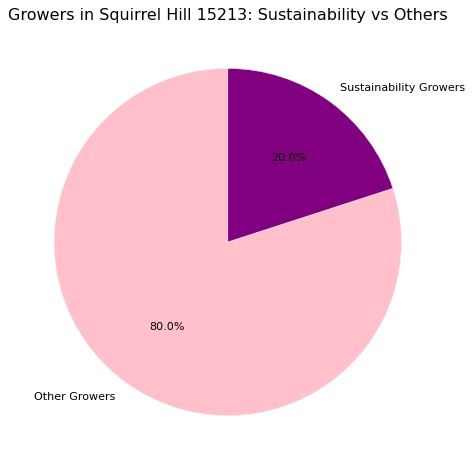

In [203]:
#find the top ZIP code 
top_zip_code = filtered_data2.iloc[0]['zip_code']  #get the ZIP code with the most growers
print(f"Top ZIP Code: {int(top_zip_code)}") 
#filter data for the top ZIP code and make a copy 
filtered_data3 = filtered_data1[filtered_data1['zip_code'] == top_zip_code].copy()  

#based on data we want to calculate the sustainability-related growers vs other growers
filtered_data3['is_sustainability_related'] = filtered_data3['category'].str.contains('sustainability', na=False, case=False)
counts = filtered_data3['is_sustainability_related'].value_counts()  

#make a pie chart based on data 
plt.style.use('ggplot') 
plt.figure(figsize=(7, 7))  
plt.pie(
    counts,  
    labels=['Other Growers', 'Sustainability Growers'],
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['pink', 'purple']  
)
plt.title(f'Growers in Squirrel Hill {int(top_zip_code)}: Sustainability vs Others') 
plt.show()  
